<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/NFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
!pip install scikeras


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [84]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Deep learning/LiveSession/nftgroomed.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,Unnamed: 0,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
0,NaN,2024-01-21 15:45:00,Smyths,0.0000,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
1,NaN,2024-01-21 15:45:00,CryptoUndeads,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,177145779596810,0.0,1.450000e+10,7.497594e+09,3.471032e+09
2,NaN,2024-01-21 15:45:00,Sujiko Warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,14009618686675,0.0,2.000000e+10,4.706550e+09,2.053297e+09
3,NaN,2024-01-21 15:45:00,Mad Lads,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,16377119658178,0.0,1.792100e+11,8.744950e+10,4.878455e+10
4,NaN,2024-01-21 15:45:00,Saga Monkes,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,26694663599280,NaN,NaN,NaN,NaN


In [95]:
# prompt: i need to pull all the occurrences of rows that contain the name Smyths

df_with_smyths = df[df['name'] == 'Smyths']
print(df_with_smyths)


      Unnamed: 0    data_retrieved_at    name  v2_floor1h  v2_floor24h  \
0            NaN  2024-01-21 15:45:00  Smyths         0.0      -0.0058   
230          NaN  2024-01-21 16:00:00  Smyths         0.0      -0.0049   
369          NaN  2024-01-21 16:15:00  Smyths         0.0      -0.0067   
516          NaN  2024-01-21 16:45:00  Smyths         0.0      -0.0058   
676          NaN  2024-01-21 17:00:00  Smyths         0.0      -0.0040   
...          ...                  ...     ...         ...          ...   
38320        NaN  2024-01-25 12:45:00  Smyths         0.0       0.0000   
38470        NaN  2024-01-25 13:15:00  Smyths         0.0       0.0000   
38620        NaN  2024-01-25 13:30:00  Smyths         0.0       0.0000   
38772        NaN  2024-01-25 13:45:00  Smyths         0.0       0.0000   
38905        NaN  2024-01-25 14:15:00  Smyths         0.0       0.0000   

       v2_floor7d  v2_buy_now_price  v2_sell_now_price  v2_sales1h  \
0          0.0090      1.115000e+10      

In [108]:
# seperating out nft's into their own data frames indexed by date and time the data was pulled every 15min
grouped_df = df.groupby('name')
list_of_dfs = [group for _, group in grouped_df]
# print all groups
for df in list_of_dfs:
  print(df)


Streaming output truncated to the last 5000 lines.
25756      1.2093       949999999.0        550000000.0           1   
25871      1.2093       949999999.0        550000000.0           1   
...           ...               ...                ...         ...   
34884      0.4076       670000000.0        430140003.0           1   
35092      0.4076       670000000.0        430100003.0           1   
35244      0.4225       670000000.0        430100003.0           1   
35396      0.4225       670000000.0        430100004.0           1   
35549      0.4225       670000000.0        430100005.0           1   

       v2_sales24h  v2_sales7d  v2_volume1h  v2_volume24h  v2_volume7d  \
25309           52          52  31587790000   31587790000  31587790000   
25424           52          52  32017790001   32017790001  32017790001   
25567           54          54   1420000001   33007790001  33007790001   
25756           54          54    990000000   33007790001  33007790001   
25871           54

In [103]:

grouped_df = df.groupby('name')
list_of_dfs = [group for _, group in grouped_df]
# print all groups
for df in list_of_dfs:
  print(df)


NameError: name 'df_with_CryptoUndeads' is not defined

In [115]:
df_with_smyths.describe().T


,count,mean,std,min,25%,50%,75%,max
v2_floor1h,260.0,-1.942308e-04,1.176510e-03,-9.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-03
v2_floor24h,260.0,-2.890385e-03,5.377325e-03,-1.350000e-02,-6.750000e-03,0.000000e+00,0.000000e+00,5.400000e-03
v2_floor7d,260.0,-4.717885e-02,3.946673e-02,-9.470000e-02,-7.317500e-02,-6.650000e-02,-2.700000e-03,1.150000e-01
v2_buy_now_price,260.0,1.105438e+10,6.780370e+07,1.098900e+10,1.100000e+10,1.100000e+10,1.115000e+10,1.115000e+10
v2_sell_now_price,260.0,1.110042e+10,5.915275e+07,1.095000e+10,1.105000e+10,1.111500e+10,1.115000e+10,1.120000e+10
v2_sales1h,260.0,4.153846e-01,6.431656e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
v2_sales24h,260.0,6.311538e+00,1.834636e+00,2.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,1.000000e+01
v2_sales7d,260.0,1.103423e+02,1.040132e+01,9.800000e+01,1.000000e+02,1.110000e+02,1.192500e+02,1.290000e+02
v2_volume1h,260.0,4.883441e+09,7.548975e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+10,3.309700e+10
v2_volume24h,260.0,7.330449e+10,1.960661e+10,2.400000e+10,6.608000e+10,7.772537e+10,8.776764e+10,1.123686e+11


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [104]:
df_with_smyths

,Unnamed: 0,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
0,NaN,2024-01-21 15:45:00,Smyths,0.0,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
230,NaN,2024-01-21 16:00:00,Smyths,0.0,-0.0049,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
369,NaN,2024-01-21 16:15:00,Smyths,0.0,-0.0067,0.0090,1.115000e+10,1.113000e+10,1,8,129,11089000000,90090526888,1528818549375,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
516,NaN,2024-01-21 16:45:00,Smyths,0.0,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,8,129,11089000000,90090526888,1528818549375,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
676,NaN,2024-01-21 17:00:00,Smyths,0.0,-0.0040,0.0090,1.115000e+10,1.113000e+10,1,8,129,11089000000,90090526888,1528818549375,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38320,NaN,2024-01-25 12:45:00,Smyths,0.0,0.0000,-0.0435,1.100000e+10,1.105000e+10,0,6,100,0,67790000000,1193586878322,10000000.0,1.120000e+10,8.573391e+09,3.209995e+09
38470,NaN,2024-01-25 13:15:00,Smyths,0.0,0.0000,-0.0435,1.100000e+10,1.105000e+10,0,6,100,0,67790000000,1193586878322,10000000.0,1.120000e+10,8.717858e+09,3.091339e+09
38620,NaN,2024-01-25 13:30:00,Smyths,0.0,0.0000,-0.0795,1.100000e+10,1.105000e+10,0,6,100,0,67790000000,1193586878322,10000000.0,1.120000e+10,8.765296e+09,3.073684e+09
38772,NaN,2024-01-25 13:45:00,Smyths,0.0,0.0000,-0.0795,1.100000e+10,1.105000e+10,0,6,100,0,67790000000,1193586878322,10000000.0,1.120000e+10,8.673406e+09,3.031815e+09


In [105]:
df.name.nunique

<bound method IndexOpsMixin.nunique of 0                        Smyths
1                 CryptoUndeads
2               Sujiko Warriors
3                      Mad Lads
4                   Saga Monkes
                  ...          
38995                 Deez Nuts
38996               bozo HYBRID
38997           Alpha Gardeners
38998    Claynosaurz: Claymaker
38999            Fearless Bulls
Name: name, Length: 39000, dtype: object>

In [106]:
df.head()

,Unnamed: 0,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
0,NaN,2024-01-21 15:45:00,Smyths,0.0000,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
1,NaN,2024-01-21 15:45:00,CryptoUndeads,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,177145779596810,0.0,1.450000e+10,7.497594e+09,3.471032e+09
2,NaN,2024-01-21 15:45:00,Sujiko Warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,14009618686675,0.0,2.000000e+10,4.706550e+09,2.053297e+09
3,NaN,2024-01-21 15:45:00,Mad Lads,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,16377119658178,0.0,1.792100e+11,8.744950e+10,4.878455e+10
4,NaN,2024-01-21 15:45:00,Saga Monkes,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,26694663599280,NaN,NaN,NaN,NaN


In [7]:
# drop the entire first column
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.shape

(39000, 17)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
v2_floor1h,37511.0,3.753736e-03,1.484820e-01,-9.860000e-01,-6.000000e-04,0.000000e+00,0.000000e+00,1.108980e+01
v2_floor24h,38941.0,9.631243e-02,1.158552e+00,-9.921000e-01,-4.440000e-02,0.000000e+00,7.090000e-02,6.002040e+01
v2_floor7d,39000.0,1.504423e-01,7.531087e-01,-9.399000e-01,-8.920000e-02,0.000000e+00,1.804000e-01,2.492590e+01
v2_buy_now_price,38773.0,1.228823e+10,2.876702e+10,1.800000e+05,7.700000e+08,3.440000e+09,1.009500e+10,3.000000e+11
v2_sell_now_price,38921.0,8.854230e+09,1.911351e+10,1.000000e+04,6.333310e+08,2.854000e+09,8.980000e+09,1.680200e+11
v2_sales1h,39000.0,1.634215e+01,1.248893e+02,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.457000e+03
v2_sales24h,39000.0,4.486638e+02,3.128895e+03,1.000000e+00,8.000000e+00,2.600000e+01,9.200000e+01,6.711600e+04
v2_sales7d,39000.0,4.065257e+03,2.407914e+04,1.000000e+00,5.200000e+01,1.470000e+02,5.370000e+02,2.904030e+05
v2_volume1h,39000.0,2.359552e+10,1.141277e+11,0.000000e+00,0.000000e+00,9.887246e+08,7.958357e+09,4.815000e+12
v2_volume24h,39000.0,5.551049e+11,2.010217e+12,1.707922e+10,3.180000e+10,6.640292e+10,1.994000e+11,2.545079e+13


In [28]:
df.head()

,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
0,0,Smyths,0.0000,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
1,0,CryptoUndeads,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,177145779596810,0.0,1.450000e+10,7.497594e+09,3.471032e+09
2,0,Sujiko Warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,14009618686675,0.0,2.000000e+10,4.706550e+09,2.053297e+09
3,0,Mad Lads,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,16377119658178,0.0,1.792100e+11,8.744950e+10,4.878455e+10
4,0,Saga Monkes,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,26694663599280,NaN,NaN,NaN,NaN


In [29]:
df.tail()

,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
38995,370,Deez Nuts,0.0602,0.2722,0.9083,2.290000e+06,2.291111e+06,643,15071,214395,5381668731,247239876950,2339548902736,NaN,NaN,NaN,NaN
38996,370,bozo HYBRID,0.0000,-0.0003,1.0192,3.998000e+10,1.500000e+10,0,6,29,0,228000000000,885877857813,500000000.0,1.500000e+10,6.700000e+09,7.474624e+09
38997,370,Alpha Gardeners,0.0455,0.0781,0.1462,3.450000e+10,3.300000e+10,1,7,35,33000000000,224400000000,1106526900000,10000.0,3.300000e+10,1.646578e+10,1.221849e+10
38998,370,Claynosaurz: Claymaker,0.0001,0.1307,0.1061,6.149900e+08,6.000000e+08,1,110,230,614936933,211518903629,307617108607,100000.0,1.750000e+10,1.220830e+09,2.493619e+09
38999,370,Fearless Bulls,0.0000,0.0171,-0.0433,6.600000e+08,6.600000e+08,0,31,40,0,205777791163,231936791163,10499.0,6.600000e+08,4.344077e+08,1.751138e+08


In [ ]:
# prompt: # every 150 rows is a 15 minute time period. i need to seperate the timeblocks every 150 rows incrementing 15 min forward each time

# Create an empty list to store the dataframes
df_list = []

# Iterate over the rows in the dataframe
for i in range(0, len(df), 600):
  # Create a new dataframe for each 150 rows
  df_temp = df.iloc[i:i+600, :]
  # Add the dataframe to the list
  df_list.append(df_temp)


In [ ]:
df_with_smiths = df_temp.describe().T

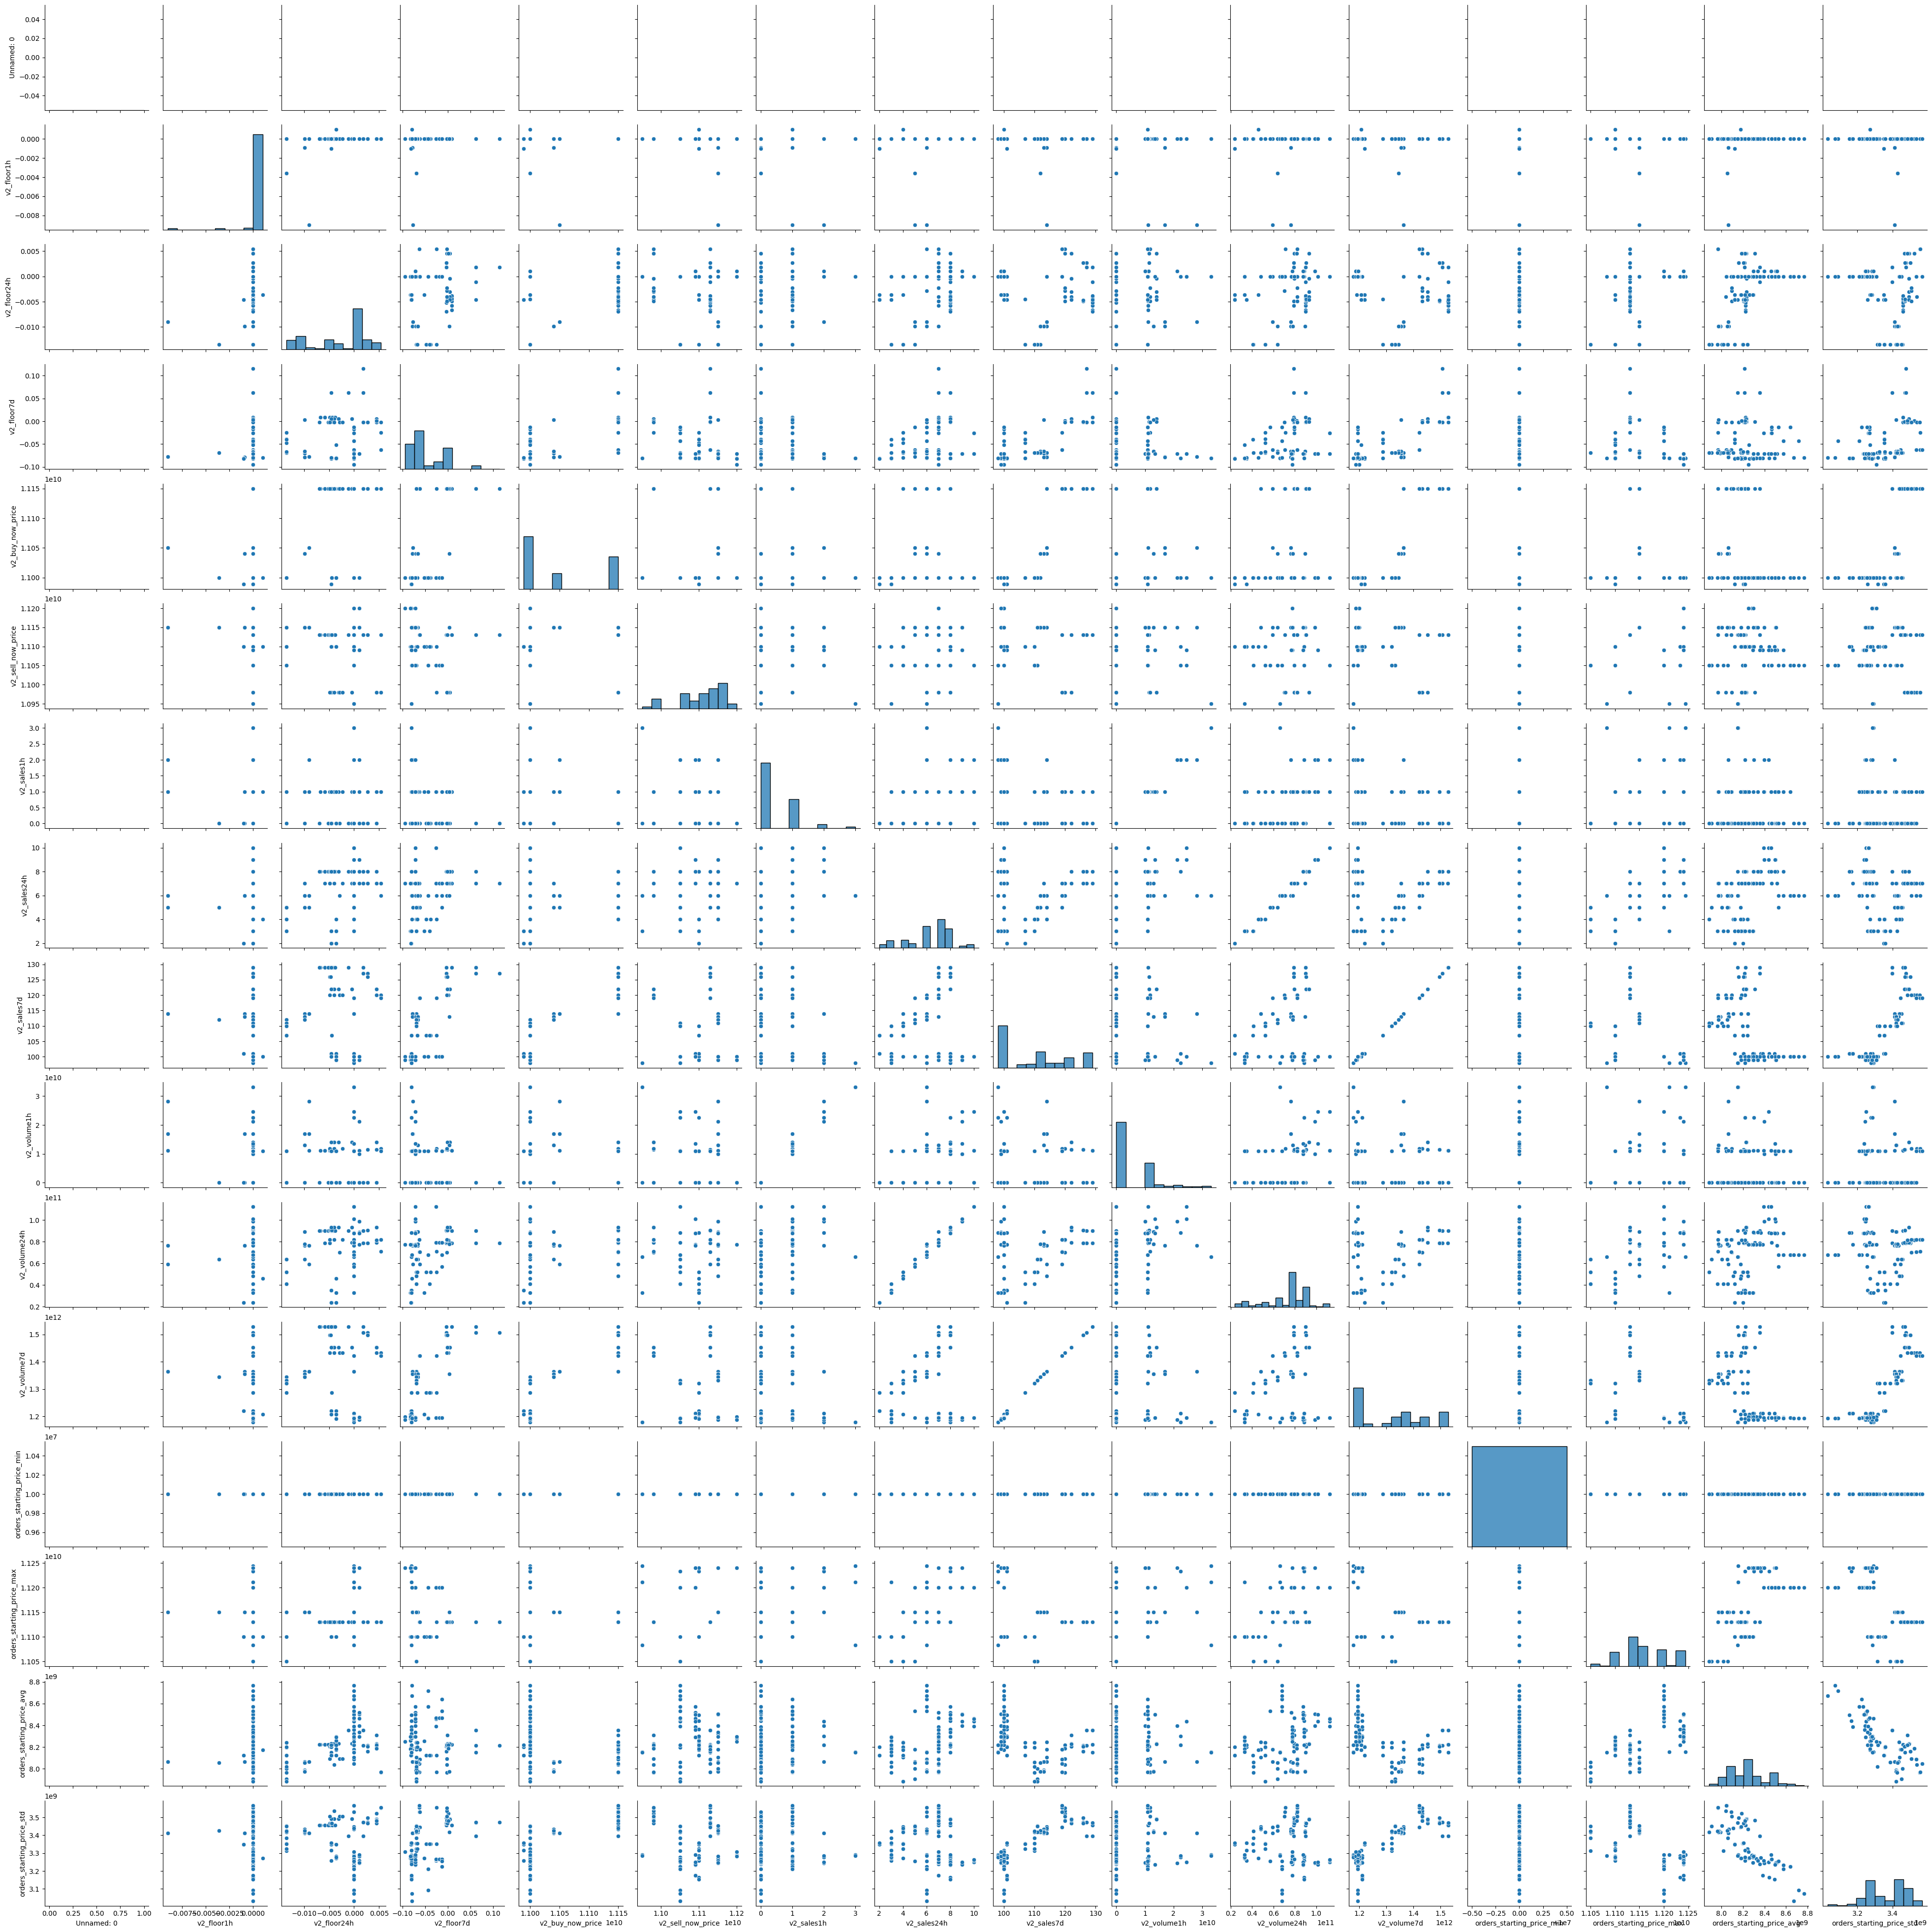

In [118]:
sns.pairplot(df_with_smyths)

In [31]:
!pip install scikit-learn


In [32]:
df.head()

,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
0,0,Smyths,0.0000,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
1,0,CryptoUndeads,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,177145779596810,0.0,1.450000e+10,7.497594e+09,3.471032e+09
2,0,Sujiko Warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,14009618686675,0.0,2.000000e+10,4.706550e+09,2.053297e+09
3,0,Mad Lads,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,16377119658178,0.0,1.792100e+11,8.744950e+10,4.878455e+10
4,0,Saga Monkes,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,26694663599280,NaN,NaN,NaN,NaN


In [36]:
# prompt: I need to fix the index colum to start at 1

df = df.reset_index(drop=True)
df.index = df.index + 1


In [40]:
df.head()

,data_retrieved_at,name,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std
1,0,Smyths,0.0000,-0.0058,0.0090,1.115000e+10,1.113000e+10,1,7,129,11120000000,79001526888,1528106822487,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09
2,0,CryptoUndeads,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,177145779596810,0.0,1.450000e+10,7.497594e+09,3.471032e+09
3,0,Sujiko Warriors,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,14009618686675,0.0,2.000000e+10,4.706550e+09,2.053297e+09
4,0,Mad Lads,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,16377119658178,0.0,1.792100e+11,8.744950e+10,4.878455e+10
5,0,Saga Monkes,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,26694663599280,NaN,NaN,NaN,NaN


In [120]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_with_smyths is your DataFrame
# Replace 'df' with 'df_with_smyths' in the code

# Create a OneHotEncoder object
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the OneHotEncoder on the 'name' column of df_with_smyths
ohe.fit(df_with_smyths[['name']])

# Transform the 'name' column using the OneHotEncoder
df_encoded = pd.DataFrame(ohe.transform(df_with_smyths[['name']]), columns=ohe.get_feature_names_out())

# Concatenate the encoded columns with the original dataframe
df_with_smyths = pd.concat([df_with_smyths, df_encoded], axis=1)

# Drop the original 'name' column
df_with_smyths.drop('name', axis=1, inplace=True)

df_with_smyths.head()


,Unnamed: 0,data_retrieved_at,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,name_Smyths
0,NaN,2024-01-21 15:45:00,0.0,-0.0058,0.009,1.115000e+10,1.113000e+10,1.0,7.0,129.0,1.112000e+10,7.900153e+10,1.528107e+12,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09,1.0
230,NaN,2024-01-21 16:00:00,0.0,-0.0049,0.009,1.115000e+10,1.113000e+10,1.0,7.0,129.0,1.112000e+10,7.900153e+10,1.528107e+12,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09,1.0
369,NaN,2024-01-21 16:15:00,0.0,-0.0067,0.009,1.115000e+10,1.113000e+10,1.0,8.0,129.0,1.108900e+10,9.009053e+10,1.528819e+12,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09,NaN
516,NaN,2024-01-21 16:45:00,0.0,-0.0058,0.009,1.115000e+10,1.113000e+10,1.0,8.0,129.0,1.108900e+10,9.009053e+10,1.528819e+12,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09,NaN
676,NaN,2024-01-21 17:00:00,0.0,-0.0040,0.009,1.115000e+10,1.113000e+10,1.0,8.0,129.0,1.108900e+10,9.009053e+10,1.528819e+12,10000000.0,1.113000e+10,8.222638e+09,3.456881e+09,NaN


In [121]:
# Redefine df_with_smyths as df
df = df_with_smyths


In [119]:
# prompt: i need to apply the standard scalar and one hot encoding on df_with_smyths

from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the columns to be scaled
numerical_columns = ['block_number', 'transaction_index', 'log_index', 'token_id', 'price', 'timestamp']

# Define the columns to be one-hot encoded
categorical_columns = ['name', 'from_address', 'to_address']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Fit the preprocessor to the data
preprocessor.fit(df_with_smyths)

# Transform the data
df_with_smyths_transformed = preprocessor.transform(df_with_smyths)


ValueError: A given column is not a column of the dataframe

In [ ]:
# prompt: i need to one hot encode the name column

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the OneHotEncoder on the 'name' column
ohe.fit(df[['name']])

# Transform the 'name' column using the OneHotEncoder
df_encoded = pd.DataFrame(ohe.transform(df[['name']]), columns=ohe.get_feature_names_out())

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'name' column
df.drop('name', axis=1, inplace=True)

df.head()


In [122]:
# prompt: i need to now use a standard scalar on my df

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the numerical columns of the dataframe
scaler.fit(df.select_dtypes(include=['float64', 'int64']))

# Transform the numerical columns of the dataframe using the StandardScaler
df_scaled = pd.DataFrame(scaler.transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Concatenate the scaled numerical columns with the original dataframe
df = pd.concat([df.select_dtypes(include=['object']), df_scaled], axis=1)

df.head()


,Unnamed: 0,data_retrieved_at,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,v2_volume7d,orders_starting_price_min,orders_starting_price_max,orders_starting_price_avg,orders_starting_price_std,name_Smyths
0,NaN,2024-01-21 15:45:00,0.165409,-0.542133,1.426194,1.412899,0.500974,0.910719,0.375982,1.797241,0.827740,0.291128,1.742918,0.0,-0.545927,-0.077428,0.832993,0.0
230,NaN,2024-01-21 16:00:00,0.165409,0.538550,-0.622510,-0.803636,-0.176546,0.910719,1.468218,-0.996244,1.143622,1.429523,-1.053725,0.0,0.880820,1.468777,-1.223443,NaN
369,NaN,2024-01-21 16:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
516,NaN,2024-01-21 16:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
676,NaN,2024-01-21 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# make a heat map for dfp
sns.heatmap(dfp, annot=True)

In [ ]:
#make a corr plot for dfp
sns.heatmap(dfp.corr(), annot=True)

In [180]:
# Check for Null or missing values and take care of those that are found
df_temp.isnull().sum()

data_retrieved_at            0
name                         0
v2_floor1h                   2
v2_floor24h                  0
v2_floor7d                   0
v2_buy_now_price             0
v2_sell_now_price            0
v2_sales1h                   0
v2_sales24h                  0
v2_sales7d                   0
v2_volume1h                  0
v2_volume24h                 0
v2_volume7d                  0
orders_starting_price_min    5
orders_starting_price_max    5
orders_starting_price_avg    5
orders_starting_price_std    5
dtype: int64

In [123]:
# Checking for missing values in relevant columns
missing_values = df[[]].isnull().sum()

# Checking df types of the relevant columns
df_types = df[[]].dtypes

missing_values, df_types


(Series([], dtype: float64), Series([], dtype: object))

In [124]:
missing_values = df.isnull().sum()

print(missing_values)


Unnamed: 0                   774
data_retrieved_at            514
v2_floor1h                   514
v2_floor24h                  514
v2_floor7d                   514
v2_buy_now_price             514
v2_sell_now_price            514
v2_sales1h                   514
v2_sales24h                  514
v2_sales7d                   514
v2_volume1h                  514
v2_volume24h                 514
v2_volume7d                  514
orders_starting_price_min    514
orders_starting_price_max    514
orders_starting_price_avg    514
orders_starting_price_std    514
name_Smyths                  514
dtype: int64


In [125]:
for column in df.select_dtypes(include=['float64', 'int64']):
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)


KeyError: 0

df = df.drop_duplicates()


In [126]:
df = pd.get_dummies(df, drop_first=True)


In [57]:
df

,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,...,name_mOnKEe,name_oogy,name_p00ts,name_pingwing,name_sega mongkes,name_sharx by sharky.fi,name_shremps,name_sloppy seels,name_snowseed_genesis,name_y00ts
1,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,...,0,0,0,0,0,0,0,0,0,0
2,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,...,0,0,0,0,0,0,0,0,0,0
3,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,...,0,0,0,0,0,0,0,0,0,0
4,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,...,0,0,0,0,0,0,0,0,0,0
5,0.0047,0.0167,0.0328,1.008539e+10,1.034500e+10,12,190,858,122104819579,1931819251735,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,0.0602,0.2722,0.9083,2.290000e+06,2.291111e+06,643,15071,214395,5381668731,247239876950,...,0,0,0,0,0,0,0,0,0,0
38996,0.0000,-0.0003,1.0192,3.998000e+10,1.500000e+10,0,6,29,0,228000000000,...,0,0,0,0,0,0,0,0,0,0
38997,0.0455,0.0781,0.1462,3.450000e+10,3.300000e+10,1,7,35,33000000000,224400000000,...,0,0,0,0,0,0,0,0,0,0
38998,0.0001,0.1307,0.1061,6.149900e+08,6.000000e+08,1,110,230,614936933,211518903629,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df


,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,...,name_mOnKEe,name_oogy,name_p00ts,name_pingwing,name_sega mongkes,name_sharx by sharky.fi,name_shremps,name_sloppy seels,name_snowseed_genesis,name_y00ts
1,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,...,0,0,0,0,0,0,0,0,0,0
2,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,...,0,0,0,0,0,0,0,0,0,0
3,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,...,0,0,0,0,0,0,0,0,0,0
4,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,...,0,0,0,0,0,0,0,0,0,0
5,0.0047,0.0167,0.0328,1.008539e+10,1.034500e+10,12,190,858,122104819579,1931819251735,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,0.0602,0.2722,0.9083,2.290000e+06,2.291111e+06,643,15071,214395,5381668731,247239876950,...,0,0,0,0,0,0,0,0,0,0
38996,0.0000,-0.0003,1.0192,3.998000e+10,1.500000e+10,0,6,29,0,228000000000,...,0,0,0,0,0,0,0,0,0,0
38997,0.0455,0.0781,0.1462,3.450000e+10,3.300000e+10,1,7,35,33000000000,224400000000,...,0,0,0,0,0,0,0,0,0,0
38998,0.0001,0.1307,0.1061,6.149900e+08,6.000000e+08,1,110,230,614936933,211518903629,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.head()

,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,...,name_mOnKEe,name_oogy,name_p00ts,name_pingwing,name_sega mongkes,name_sharx by sharky.fi,name_shremps,name_sloppy seels,name_snowseed_genesis,name_y00ts
1,-0.0217,0.1445,0.0000,1.125000e+10,1.231000e+10,69,1745,15831,905860900000,21415544113146,...,0,0,0,0,0,0,0,0,0,0
2,-0.0197,0.0473,0.0000,5.980000e+09,6.281515e+09,245,753,2147,1668010680521,4978695807348,...,0,0,0,0,0,0,0,0,0,0
3,-0.0101,-0.0117,0.0125,1.620000e+11,1.680100e+11,1,22,95,163700000000,3764069938179,...,0,0,0,0,0,0,0,0,0,0
4,-0.0399,-0.1360,-0.2552,8.640000e+09,9.190000e+09,5,211,2181,45474990000,2390885370199,...,0,0,0,0,0,0,0,0,0,0
5,0.0047,0.0167,0.0328,1.008539e+10,1.034500e+10,12,190,858,122104819579,1931819251735,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df

,v2_floor1h,v2_floor24h,v2_floor7d,v2_buy_now_price,v2_sell_now_price,v2_sales1h,v2_sales24h,v2_sales7d,v2_volume1h,v2_volume24h,...,data_retrieved_at_2024-01-25 6:45:00,data_retrieved_at_2024-01-25 7:00:00,data_retrieved_at_2024-01-25 7:30:00,data_retrieved_at_2024-01-25 7:45:00,data_retrieved_at_2024-01-25 8:00:00,data_retrieved_at_2024-01-25 8:30:00,data_retrieved_at_2024-01-25 8:45:00,data_retrieved_at_2024-01-25 9:00:00,data_retrieved_at_2024-01-25 9:30:00,data_retrieved_at_2024-01-25 9:45:00
0,0.165409,-0.542133,1.426194,1.412899,0.500974,0.910719,0.375982,1.797241,0.827740,0.291128,...,0,0,0,0,0,0,0,0,0,0
230,0.165409,0.538550,-0.622510,-0.803636,-0.176546,0.910719,1.468218,-0.996244,1.143622,1.429523,...,0,0,0,0,0,0,0,0,0,0
369,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0
516,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0
676,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0
513,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0
514,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0
515,0.165409,0.538550,-0.490500,-0.803636,0.246904,-0.647090,0.375982,0.063354,-0.648149,0.225914,...,0,0,0,0,0,0,0,0,0,0


In [129]:
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'v2_buy_now_price'

X = df.drop(target, axis=1)
y = df[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [130]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (excluding one-hot encoded columns)
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [131]:
X_val.dtypes

v2_floor1h                              float64
v2_floor24h                             float64
v2_floor7d                              float64
v2_sell_now_price                       float64
v2_sales1h                              float64
                                         ...   
data_retrieved_at_2024-01-25 8:30:00      uint8
data_retrieved_at_2024-01-25 8:45:00      uint8
data_retrieved_at_2024-01-25 9:00:00      uint8
data_retrieved_at_2024-01-25 9:30:00      uint8
data_retrieved_at_2024-01-25 9:45:00      uint8
Length: 274, dtype: object

In [132]:
X_train.shape

(541, 274)

In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [79]:
df.nunique()

v2_floor1h                 2747
v2_floor24h                5903
v2_floor7d                 6779
v2_buy_now_price           5051
v2_sell_now_price          7664
                           ... 
name_sharx by sharky.fi       2
name_shremps                  2
name_sloppy seels             2
name_snowseed_genesis         2
name_y00ts                    2
Length: 675, dtype: int64

In [134]:
model.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])


In [135]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 0.6354 - accuracy: 0.0000e+00 - val_loss: 0.5612 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4509 - accuracy: 0.0000e+00 - val_loss: 0.3066 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.0000e+00 - val_loss: -0.1540 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: -0.5021 - accuracy: 0.0000e+00 - val_loss: -0.9097 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: -1.4736 - accuracy: 0.0000e+00 - val_loss: -2.0563 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: -2.9233 - accuracy: 0.0000e+00 - val_loss: -3.6547 - val_accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: -5.0285 - accuracy: 0.000

In [136]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


4/4 [==============================] - 0s 4ms/step - loss: -1283235.0000 - accuracy: 0.0000e+00
Test Loss: [-1283235.0, 0.0]


In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [141]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='softmax'))


In [142]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(541, 274)
(117, 274)
(541,)
(117,)


In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [145]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [146]:
model = Sequential()
model.add(Dense(units=20, input_shape=(None, 602)))
model.add(Dense(100, activation='relu', input_shape=(n_features,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='softmax'))
model.add(Dense(1))

In [147]:
class MyOptimizer(tf.keras.optimizers.Optimizer):

    def __init__(self, learning_rate=0.001):
        super().__init__(learning_rate)
        self.learning_rate = learning_rate

    def get_config(self):
        config = super().get_config()
        config.update({
            "learning_rate": self.learning_rate,
        })
        return config

    def compute_gradients(self, loss, var_list):
        gradients = tf.gradients(loss, var_list)
        gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
        return gradients, var_list

In [148]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [149]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, None, 20)          12060     
                                                                 
 dense_34 (Dense)            (None, None, 100)         2100      
                                                                 
 dense_35 (Dense)            (None, None, 100)         10100     
                                                                 
 dense_36 (Dense)            (None, None, 20)          2020      
                                                                 
 dense_37 (Dense)            (None, None, 1)           21        
                                                                 
Total params: 26301 (102.74 KB)
Trainable params: 26301 (102.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [192]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
14/14 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_los

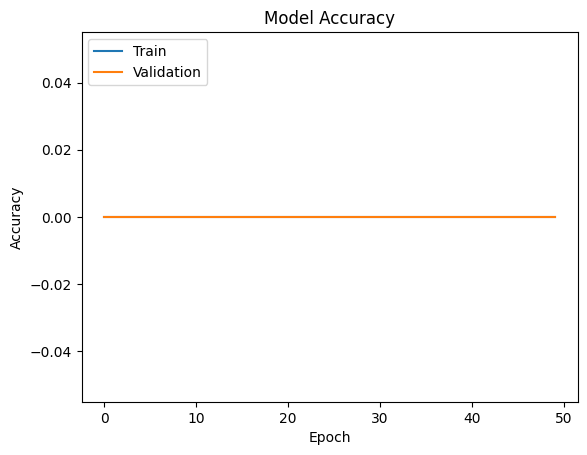

In [194]:
import matplotlib.pyplot as plt

# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [151]:
print(X_train.shape)

(541, 274)


In [152]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, None, 20)          12060     
                                                                 
 dense_34 (Dense)            (None, None, 100)         2100      
                                                                 
 dense_35 (Dense)            (None, None, 100)         10100     
                                                                 
 dense_36 (Dense)            (None, None, 20)          2020      
                                                                 
 dense_37 (Dense)            (None, None, 1)           21        
                                                                 
Total params: 26301 (102.74 KB)
Trainable params: 26301 (102.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
model = Sequential()
model.add(Dense(602, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
14/14 [==============================] - 2s 36ms/step - loss: 0.2184 - accuracy: 0.0000e+00 - val_loss: -0.4505 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 0s 13ms/step - loss: -1.1120 - accuracy: 0.0000e+00 - val_loss: -2.1571 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 0s 13ms/step - loss: -3.4129 - accuracy: 0.0000e+00 - val_loss: -5.1498 - val_accuracy: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: -7.9027 - accuracy: 0.0000e+00 - val_loss: -10.9711 - val_accuracy: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 0s 12ms/step - loss: -15.8002 - accuracy: 0.0000e+00 - val_loss: -21.3980 - val_accuracy: 0.0000e+00
Epoch 6/50
14/14 [==============================] - 0s 12ms/step - loss: -29.8087 - accuracy: 0.0000e+00 - val_loss: -37.6831 - val_accuracy: 0.0000e+00
Epoch 7/50
14/14 [==============================] - 0s 15ms/step - loss: -49.9454 - accura

4/4 [==============================] - 0s 5ms/step - loss: -35637.5430 - accuracy: 0.0000e+00


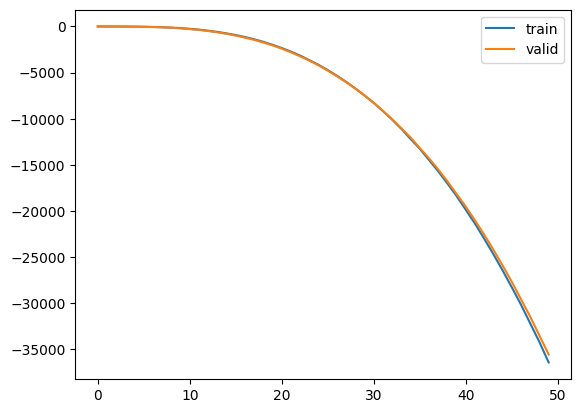

In [154]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results = model.evaluate(X_test, y_test)

In [155]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Model 2

In [156]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [157]:
model1 = Sequential()
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [158]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)


Epoch 1/50
7/7 [==============================] - 1s 42ms/step - loss: 0.2208 - accuracy: 0.0000e+00 - val_loss: -0.4127 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: -0.9551 - accuracy: 0.0000e+00 - val_loss: -1.9707 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: -3.0155 - accuracy: 0.0000e+00 - val_loss: -4.8400 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: -7.3800 - accuracy: 0.0000e+00 - val_loss: -11.0831 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: -16.2307 - accuracy: 0.0000e+00 - val_loss: -24.6366 - val_accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: -36.6360 - accuracy: 0.0000e+00 - val_loss: -52.1142 - val_accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: -73.5658 - accuracy: 0.0000e+00

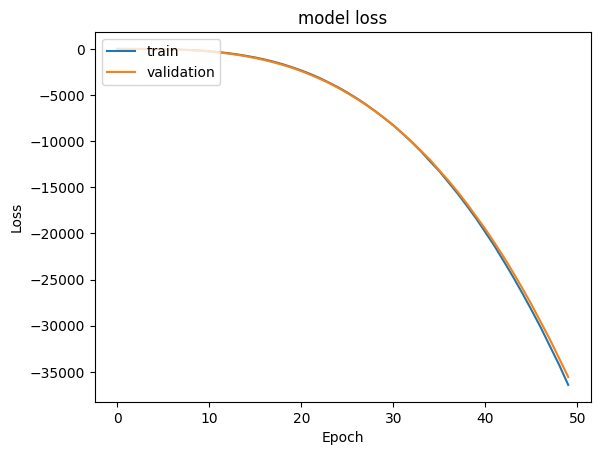

In [159]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [160]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_regression_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dropout(0.1),
        Dense(25, activation='relu'),
        Dense(1, activation='linear'),  # Output layer for regression
    ])

    # Compile the model with a regression-specific loss function and lower learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Build the model
model = build_regression_model(X_train.shape[1])

# Model summary
model.summary()

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               35200     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [162]:
# summary of the last model run the sequential model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               35200     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [163]:
history1 = history

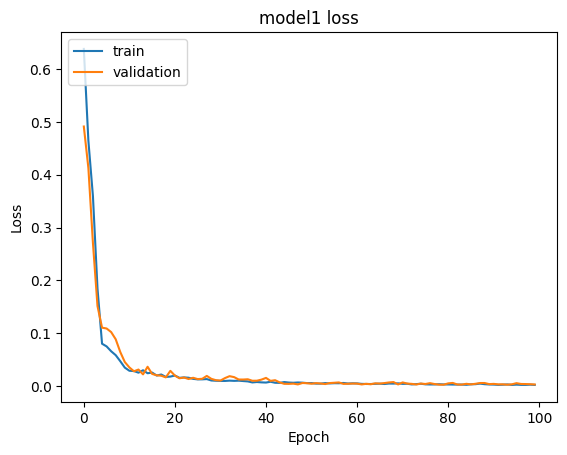

In [164]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [165]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(11,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
model_1.add(Dense(1, activation='sigmoid'))

In [170]:


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 2s 21ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0056
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 7/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0045
Epoch 9/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0126 - val_loss: 0.0083
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0089
Epoch 11

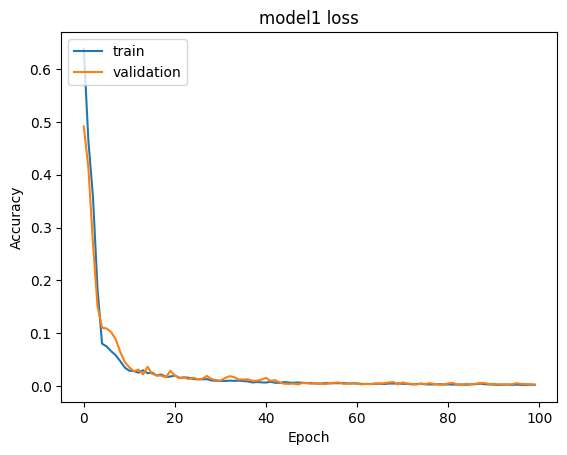

In [191]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_regression_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dropout(0.1),
        Dense(25, activation='relu'),
        Dense(1, activation='linear'),  # Output layer for regression
    ])

    # Compile the model with a regression-specific loss function and lower learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Build the model
model = build_regression_model(X_train.shape[1])

# Model summary
model.summary()

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               35200     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 100)               12900     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dense_42 (Dense)            (None, 50)                5050      
                                                                 
 dropout_22 (Dropout)        (None, 50)               

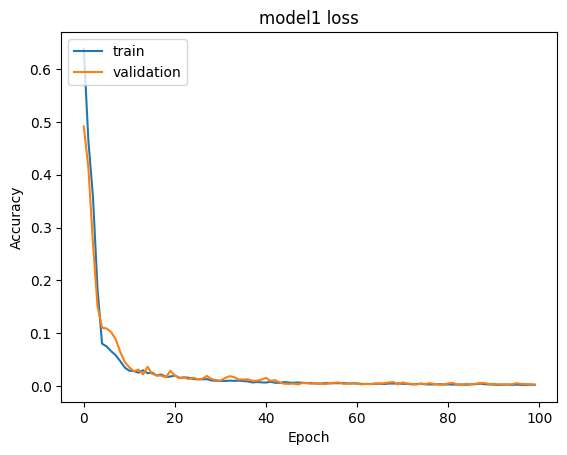

In [181]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [183]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_regression_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dropout(0.1),
        Dense(25, activation='relu'),
        Dense(1, activation='linear'),  # Output layer for regression
    ])

    # Compile the model with a regression-specific loss function and lower learning rate
    # Include 'accuracy' in metrics if you want to track accuracy
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    return model

# Build the model
model = build_regression_model(X_train.shape[1])

# Model summary
model.summary()

# Fit the model without the 'metrics' parameter in this method
history2 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               35200     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               12900     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)               

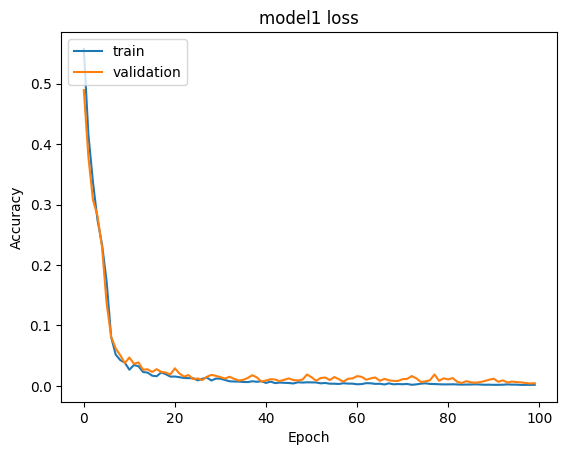

In [187]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

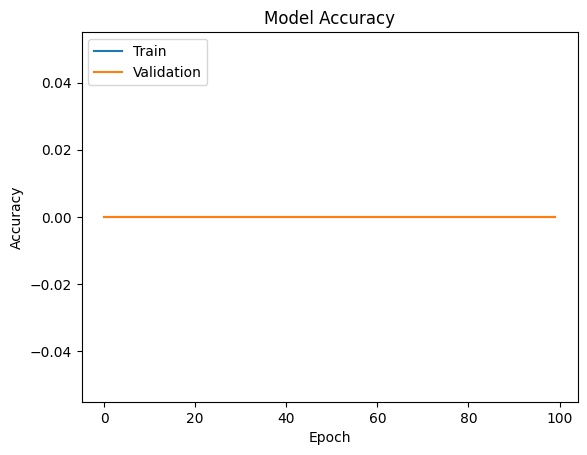

In [190]:
import matplotlib.pyplot as plt

# Plotting the accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_regression_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dropout(0.1),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dropout(0.1),
        Dense(25, activation='relu'),
        Dense(1, activation='linear'),  # Output layer for regression
    ])

    # Compile the model with a regression-specific loss function and optimizer
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Build the model
model = build_regression_model(X_train.shape[1])

# Model summary
model.summary()

# Fit the model
history2 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               35200     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               12900     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dropout_8 (Dropout)         (None, 50)               

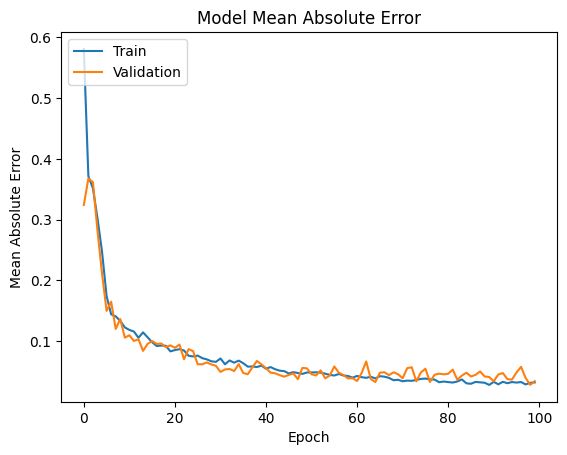

In [197]:
import matplotlib.pyplot as plt

# Plotting the mean absolute error
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
